In [6]:
!pip install matplotlib --user

  Using cached matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.8.2-cp312-cp312-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl (187 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


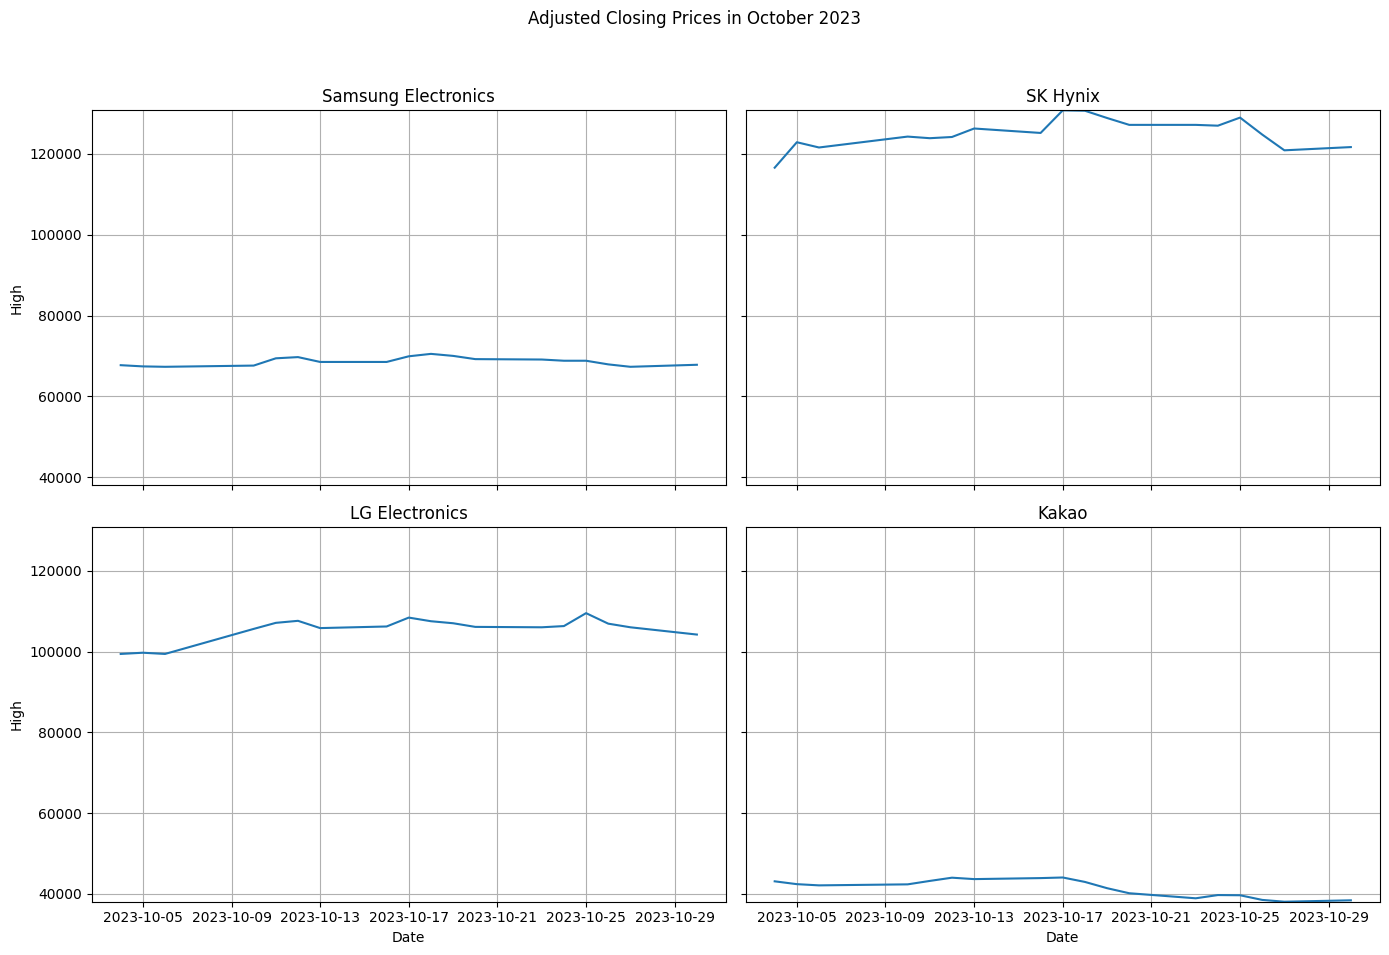

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 티커와 기업 이름 매핑
tickers_to_names = {
    "005930.KS": "Samsung Electronics",
    "000660.KS": "SK Hynix",
    "066570.KS": "LG Electronics",
    "035720.KS": "Kakao"
}

# 티커 리스트
tickers = list(tickers_to_names.keys())

start_date = "2023-10-01"
end_date = "2023-10-31"

# 데이터 로드
all_data = {ticker: yf.download(ticker, start=start_date, end=end_date) for ticker in tickers}

# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

# 최대/최소 주가 계산
max_price = max([df['High'].max() for df in all_data.values()])
min_price = min([df['High'].min() for df in all_data.values()])

# 각 티커에 대한 그래프 그리기
for i, ticker in enumerate(tickers):
    company_name = tickers_to_names[ticker]  # 티커로부터 기업 이름 가져오기
    axes[i].plot(all_data[ticker].index, all_data[ticker]['High'], label=company_name)
    axes[i].set_title(company_name)  # 기업 이름으로 제목 설정
    axes[i].grid(True)
    axes[i].set_ylim([min_price, max_price])

# 전체 그래프 제목 설정
plt.suptitle('Adjusted Closing Prices in October 2023')

# x축과 y축 레이블 설정
for ax in axes[-2:]:
    ax.set_xlabel('Date')
for ax in axes[::2]:
    ax.set_ylabel('High')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


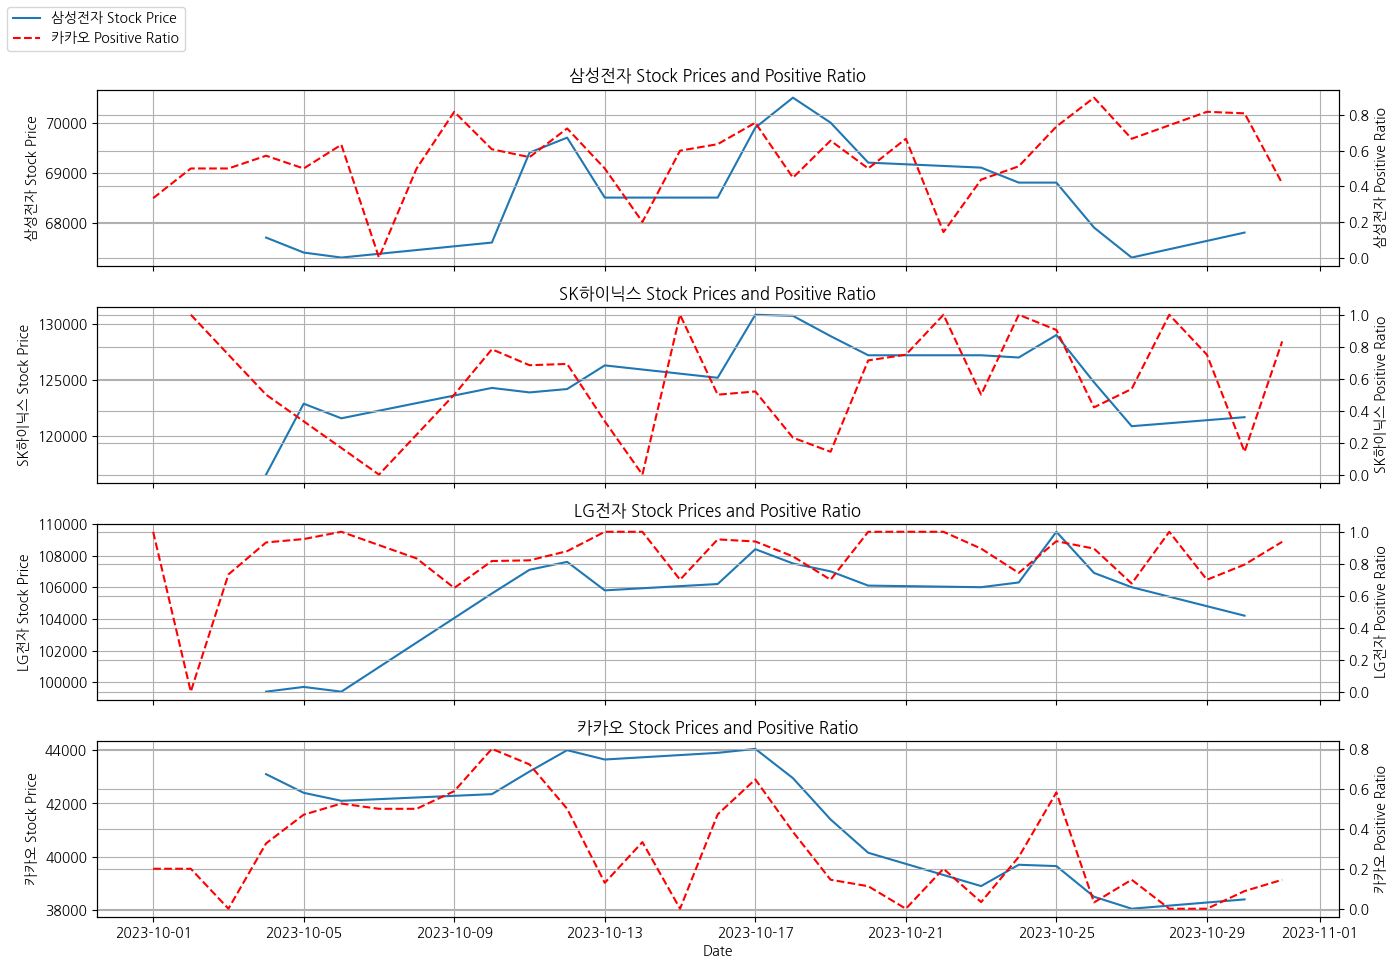

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 다운로드 및 설정 (Windows 환경)
font_path = "C:\\Windows\\Fonts\\NanumGothic.ttf"  # 나눔고딕 폰트 경로 (Windows 환경에 맞게 설정)
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()

# 티커와 기업 이름 매핑
tickers_to_names = {
    "005930.KS": "삼성전자",
    "000660.KS": "SK하이닉스",
    "066570.KS": "LG전자",
    "035720.KS": "카카오"
}

# 티커 리스트
tickers = list(tickers_to_names.keys())

start_date = "2023-10-01"
end_date = "2023-10-31"

# 서브플롯 생성 (한 개의 기업에 대한 그래프마다 하나의 서브플롯을 사용)
fig, axes = plt.subplots(nrows=len(tickers), figsize=(14, 10), sharex=True, sharey=False)

# 각 기업에 대한 그래프 그리기
for i, ticker in enumerate(tickers):
    company_name = tickers_to_names[ticker]  # 티커로부터 기업 이름 가져오기
    # 주가 그래프 그리기
    axes[i].plot(all_data[ticker].index, all_data[ticker]['High'], label=f'{company_name} Stock Price')
    axes[i].set_ylabel(f'{company_name} Stock Price')  # 각 기업별로 다른 y 라벨 설정
    # 엑셀 파일 로드
    excel_file_path = f'./company/4_{company_name}.xlsx'  # 각 기업에 대한 엑셀 파일 경로
    df_excel = pd.read_excel(excel_file_path)
    df_excel.set_index('Date', inplace=True)
    # Positive Ratio 그래프 그리기
    axes2 = axes[i].twinx()
    axes2.plot(df_excel.index, df_excel['Positive_ratio'], label=f'{company_name} Positive Ratio', color='red', linestyle='--')
    axes2.set_ylabel(f'{company_name} Positive Ratio')  # 각 기업별로 다른 y 라벨 설정
    # 서브플롯 제목 설정
    axes[i].set_title(f'{company_name} Stock Prices and Positive Ratio')
    # 그리드 설정
    axes[i].grid(True)
    axes2.grid(True)

# x축 레이블 설정
for ax in axes[-1:]:
    ax.set_xlabel('Date')

# 레전드 표시
lines, labels = axes[0].get_legend_handles_labels()
lines2, labels2 = axes2.get_legend_handles_labels()
fig.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


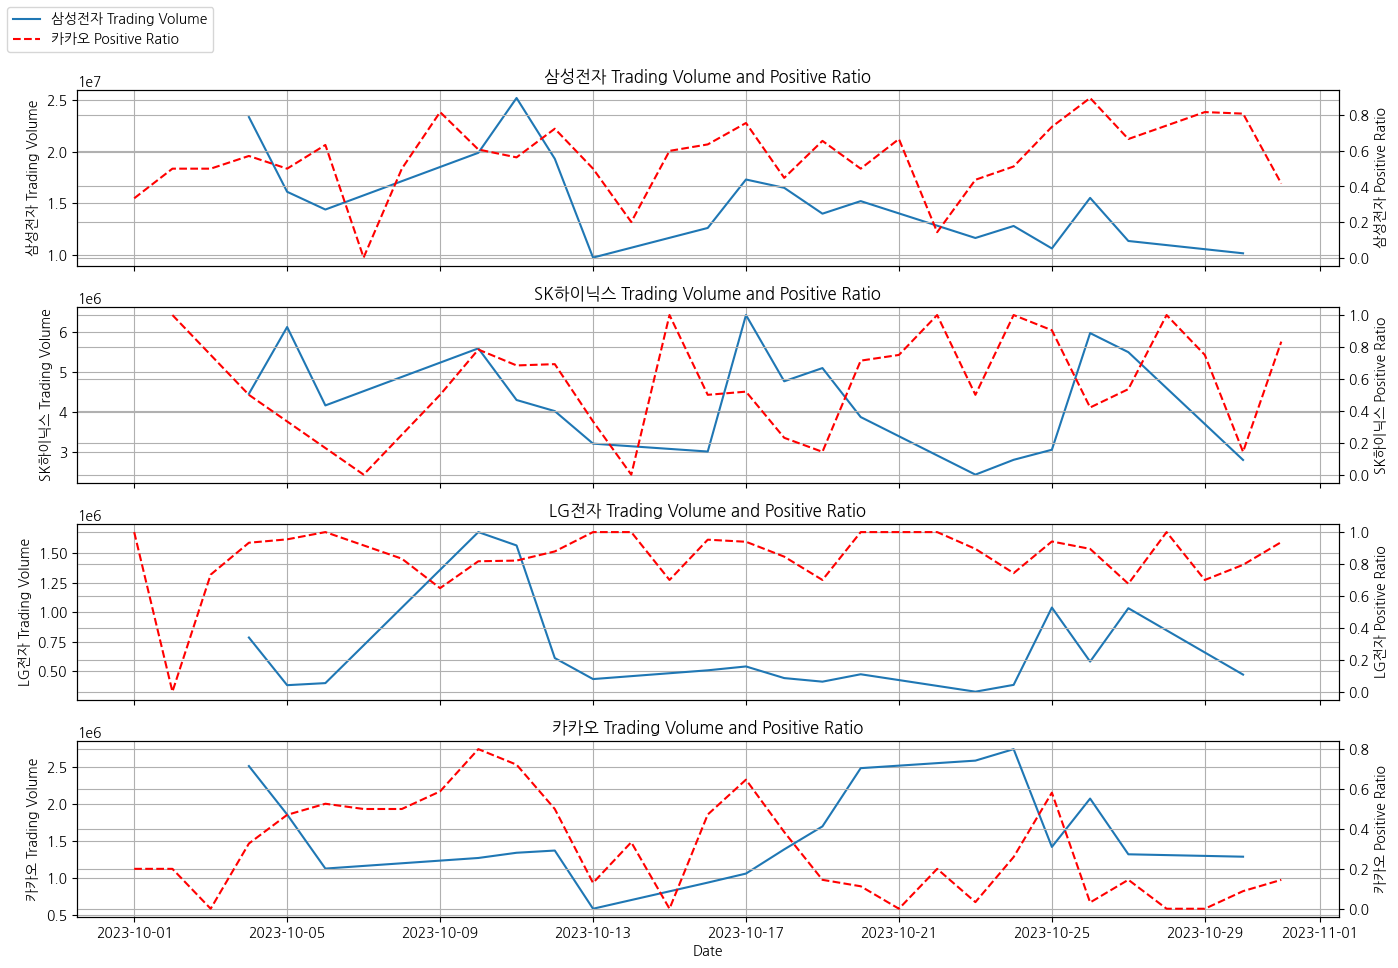

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 다운로드 및 설정 (Windows 환경)
font_path = "C:\\Windows\\Fonts\\NanumGothic.ttf"  # 나눔고딕 폰트 경로 (Windows 환경에 맞게 설정)
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()

# 티커와 기업 이름 매핑
tickers_to_names = {
    "005930.KS": "삼성전자",
    "000660.KS": "SK하이닉스",
    "066570.KS": "LG전자",
    "035720.KS": "카카오"
}

# 티커 리스트
tickers = list(tickers_to_names.keys())

start_date = "2023-10-01"
end_date = "2023-10-31"

# 서브플롯 생성 (한 개의 기업에 대한 그래프마다 하나의 서브플롯을 사용)
fig, axes = plt.subplots(nrows=len(tickers), figsize=(14, 10), sharex=True, sharey=False)

# 각 기업에 대한 그래프 그리기
for i, ticker in enumerate(tickers):
    company_name = tickers_to_names[ticker]  # 티커로부터 기업 이름 가져오기

    # 주식 데이터 로드 (거래량 정보를 포함하는 것으로 가정)
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # 거래량 그래프 그리기
    axes[i].plot(stock_data.index, stock_data['Volume'], label=f'{company_name} Trading Volume')
    axes[i].set_ylabel(f'{company_name} Trading Volume')  # 각 기업별로 다른 y 라벨 설정

    # 엑셀 파일 로드
    excel_file_path = f'./company/4_{company_name}.xlsx'  # 각 기업에 대한 엑셀 파일 경로
    df_excel = pd.read_excel(excel_file_path)
    df_excel.set_index('Date', inplace=True)

    # Positive Ratio 그래프 그리기
    axes2 = axes[i].twinx()
    axes2.plot(df_excel.index, df_excel['Positive_ratio'], label=f'{company_name} Positive Ratio', color='red', linestyle='--')
    axes2.set_ylabel(f'{company_name} Positive Ratio')  # 각 기업별로 다른 y 라벨 설정

    # 서브플롯 제목 설정
    axes[i].set_title(f'{company_name} Trading Volume and Positive Ratio')

    # 그리드 설정
    axes[i].grid(True)
    axes2.grid(True)

# x축 레이블 설정
for ax in axes[-1:]:
    ax.set_xlabel('Date')

# 레전드 표시
lines, labels = axes[0].get_legend_handles_labels()
lines2, labels2 = axes2.get_legend_handles_labels()
fig.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
